# Data Understanding, Exploratory Data Analysis & Data Cleaning/Transformation Approach

## 1. Data Understanding

### a) Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
pd.set_option('display.max_columns', None)

rcParams['figure.figsize'] = (10,7)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

### b) Load Dataset

In [2]:
df = pd.read_csv(r'C:/Users/Dimas/OneDrive/Dokumen\Portofolio Project/Supply Chain Optimization for a FMCG Company/FMCG_data.csv')

### c) Dataset Information

In [3]:
df.shape

(25000, 24)

This dataset consists of 25000 rows and 24 columns.

**Information for each column**

- Ware_house_ID = Product warehouse ID  
- WH_Manager_ID = Employee ID of warehouse manager  
- Location_type = Location of warehouse like in city or village  
- WH_capacity_size = Storage capacity size of the warehouse  
- zone = Zone of the warehouse  
- WH_regional_zone = Regional zone of the warehouse under each zone  
- num_refill_req_l3m = Number of times refilling has been done in last 3 months  
- transport_issue_l1y = Any transport issue like accident or goods stolen reported in last one year  
- Competitor_in_mkt = Number of instant noodles competitor in the market  
- retail_shop_num = Number of retails shop who sell the product under the warehouse area  
- wh_owner_type = Company is owning the warehouse or they have get the warehouse on rent  
- distributor_num = Number of distributer works in between warehouse and retail shops  
- flood_impacted = Warehouse is in the Flood impacted area indicator  
- flood_proof = Warehouse is flood proof indicators. Like storage is at some height not directly on the ground  
- electric_supply = Warehouse have electric back up like generator, so they can run the warehouse in load shedding  
- dist_from_hub = Distance between warehouse to the production hub in Kms  
- workers_num = Number of workers working in the warehouse  
- wh_est_year = Warehouse established year  
- storage_issue_reported_l3m = Warehouse reported storage issue to corporate office in last 3 months. Like rat, fungus because of moisture etc.  
- temp_reg_mach = Warehouse have temperature regulating machine indicator  
- approved_wh_govt_certificate = What kind of standard certificate has been issued to the warehouse from government regulatory body  
- wh_breakdown_l3m = Number of time warehouse face a breakdown in last 3 months. Like strike from worker, flood, or electrical failure  
- govt_check_l3m = Number of time government Officers have been visited the warehouse to check the quality and expire of stored food in last 3 months  
- product_wg_ton = Product has been shipped in last 3 months. Weight is in tons

## 2. Exploratory Data Analysis 1 - Problem Finding

### a) Descriptive Statistics

In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

After looking at the information above, the data type of each column does not seem to have any issues or problems.

In [5]:
df.isna().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

There are several columns that have missing values, namely <mark>**workers_num**</mark>, <mark>**wh_est_year**</mark>, and <mark>**approved_wh_govt_certificate**</mark>. These columns will be further analyzed for imputation purposes.

In [6]:
categoricals = df.select_dtypes(include=['object']).columns.tolist()
numericals = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [7]:
print(categoricals)
print(numericals)

['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']
['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton']


I separated the columns based on categorical and numeric data types to make it easier to understand the data further.

In [8]:
df.head(5)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


In [9]:
df.sample(5)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
19196,WH_119196,EID_69196,Rural,Large,North,Zone 6,0,1,4,4232,Rented,70,0,0,0,215,20.0,NaN,6,0,A+,2,29,8115
17871,WH_117871,EID_67871,Rural,Large,West,Zone 5,8,0,4,4292,Company Owned,63,0,0,1,211,35.0,2005.0,25,0,B,2,14,29073
6779,WH_106779,EID_56779,Rural,Large,North,Zone 6,5,0,3,4798,Rented,37,0,0,0,92,28.0,2011.0,19,0,A,5,28,24078
22700,WH_122700,EID_72700,Rural,Large,South,Zone 5,3,3,2,5454,Company Owned,25,0,0,0,217,40.0,NaN,5,0,B+,4,10,6104
2872,WH_102872,EID_52872,Urban,Mid,North,Zone 4,6,0,2,4138,Company Owned,54,1,0,1,101,29.0,NaN,20,1,B+,5,26,24135


In [10]:
df.tail(5)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
24995,WH_124995,EID_74995,Rural,Small,North,Zone 1,3,0,4,5390,Rented,19,0,0,1,142,34.0,2005.0,22,1,A,2,30,32093
24996,WH_124996,EID_74996,Rural,Mid,West,Zone 2,6,0,4,4490,Company Owned,57,0,0,1,130,28.0,2012.0,10,0,B,4,18,12114
24997,WH_124997,EID_74997,Urban,Large,South,Zone 5,7,0,2,5403,Rented,31,1,0,1,147,NaN,NaN,23,0,B+,5,25,27080
24998,WH_124998,EID_74998,Rural,Small,North,Zone 1,1,0,2,10562,Rented,25,0,0,1,60,25.0,NaN,18,0,A,6,30,25093
24999,WH_124999,EID_74999,Rural,Mid,West,Zone 4,8,2,4,5664,Company Owned,21,0,1,1,239,39.0,2019.0,4,0,B+,2,11,5058


I tried to see a snapshot of the top 5 rows of data, 5 rows of random sample data and the last 5 rows of data to further understand each value in the columns.

In [11]:
df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.000000,13119.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,3.104200,4985.711560,42.418120,0.098160,0.054640,0.656880,163.537320,28.944398,2009.383185,17.130440,0.303280,3.482040,18.812280,22102.632920
std,2.606612,1.199449,1.141663,1052.825252,16.064329,0.297537,0.227281,0.474761,62.718609,7.872534,7.528230,9.161108,0.459684,1.690335,8.632382,11607.755077
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13059.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,21.000000,22101.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [12]:
print(df['num_refill_req_l3m'].value_counts())
print('-------------------------------------')
print(df['transport_issue_l1y'].value_counts())
print('-------------------------------------')
print(df['Competitor_in_mkt'].value_counts())
print('-------------------------------------')
print(df['wh_breakdown_l3m'].value_counts())
print('-------------------------------------')
print(df['wh_breakdown_l3m'].value_counts())

num_refill_req_l3m
3    2990
8    2970
5    2941
0    2912
7    2873
1    2856
4    2846
6    2804
2    1808
Name: count, dtype: int64
-------------------------------------
transport_issue_l1y
0    15215
1     4644
2     2198
3     1818
4      777
5      348
Name: count, dtype: int64
-------------------------------------
Competitor_in_mkt
2     8669
3     7094
4     6708
5     1265
6      546
1      432
7      189
8       76
9       13
10       6
12       1
0        1
Name: count, dtype: int64
-------------------------------------
wh_breakdown_l3m
2    5076
3    5006
4    4037
6    4012
5    3925
1    2036
0     908
Name: count, dtype: int64
-------------------------------------
wh_breakdown_l3m
2    5076
3    5006
4    4037
6    4012
5    3925
1    2036
0     908
Name: count, dtype: int64


All data from the numeric columns starting from the average, minimum value, median and maximum value have no anomalies or irregularities, everything looks normal. But there are some columns whose minimum and maximum values are always 0 and 1, namely <mark>flood_impacted</mark>, <mark>flood_proof</mark>, <mark>electric_supply</mark>, and <mark>temp_reg_mach</mark>. These columns contain nominal data, namely data that is only used to label or categorize without order. In the data transformation section, we will process and map it to the defined value. In the <mark>Competitor_in_mkt</mark> column, there are several values that have very little data and are not representative for visualization, we can create a segmentation for values that are more than or equal to 9.

In [13]:
df[categoricals].describe()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
count,25000,25000,25000,25000,25000,25000,25000,24092
unique,25000,25000,2,3,4,6,2,5
top,WH_124999,EID_74999,Rural,Large,North,Zone 6,Company Owned,C
freq,1,1,22957,10169,10278,8339,13578,5501


In [14]:
print(df['Location_type'].value_counts())
print("================================")
print(df['WH_capacity_size'].value_counts())
print("================================")
print(df['zone'].value_counts())
print("================================")
print(df['WH_regional_zone'].value_counts())
print("================================")
print(df['wh_owner_type'].value_counts())
print("================================")
print(df['approved_wh_govt_certificate'].value_counts())

Location_type
Rural    22957
Urban     2043
Name: count, dtype: int64
WH_capacity_size
Large    10169
Mid      10020
Small     4811
Name: count, dtype: int64
zone
North    10278
West      7931
South     6362
East       429
Name: count, dtype: int64
WH_regional_zone
Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: count, dtype: int64
wh_owner_type
Company Owned    13578
Rented           11422
Name: count, dtype: int64
approved_wh_govt_certificate
C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: count, dtype: int64


Put aside the Ware_House_ID and WH_Manager_ID columns because they are identifier or key data for each row. What is interesting is the Location_type column, where from the composition of the column values, the majority of warehouses are located in rural areas. The other columns still look normal.

### b) Univariate Analysis

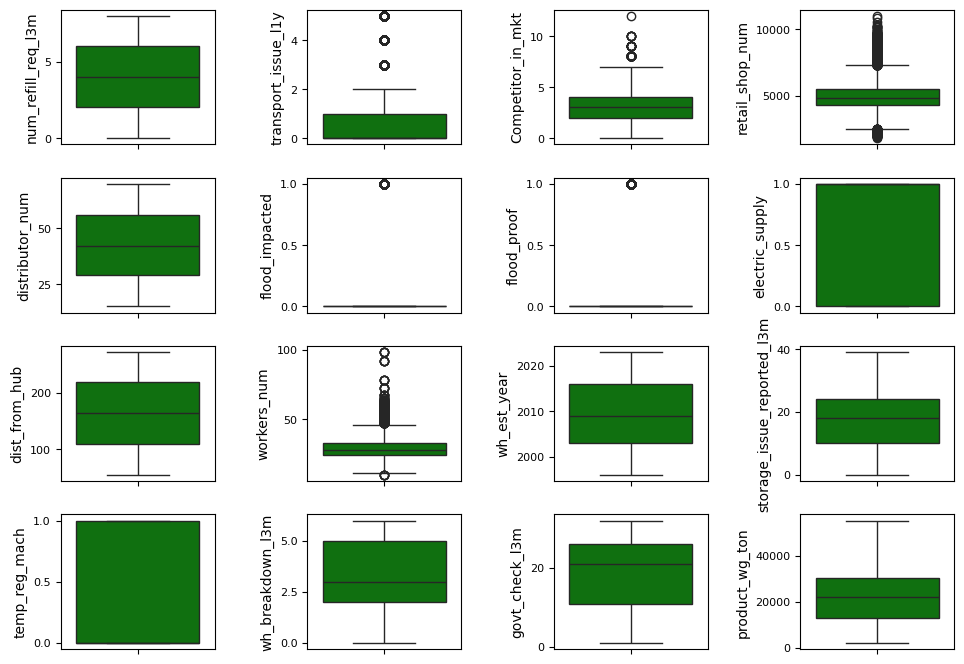

In [15]:
features = numericals
for i in range(0, len(features)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = df[features[i]], color='green', orient='v')
    plt.ylabel(features[i],fontsize=10)
    plt.yticks(fontsize=8)
    plt.tight_layout(pad=2.0)

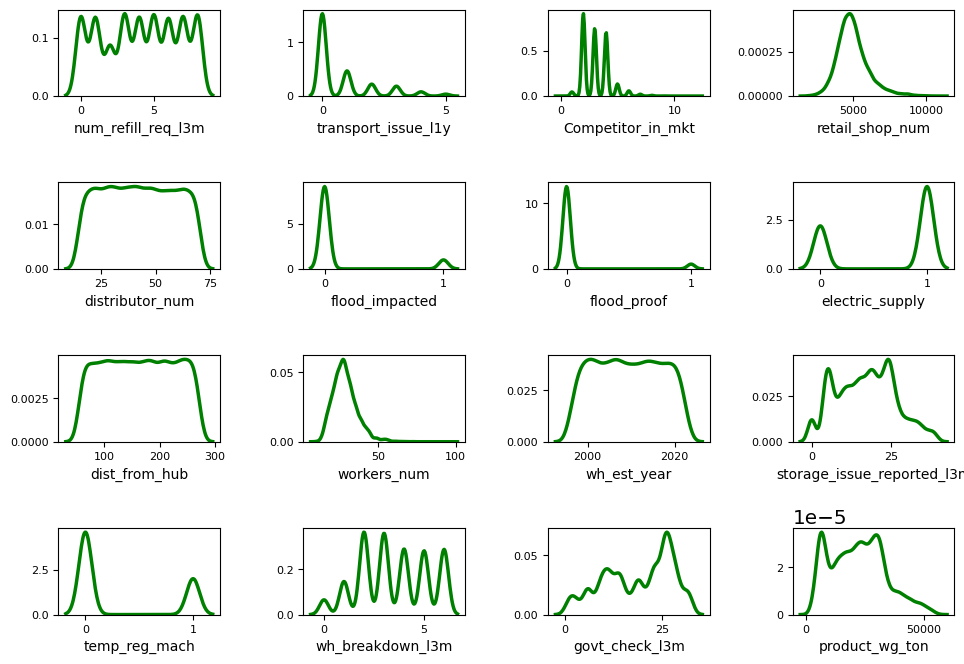

In [16]:
features1 = numericals
for i in range(0, len(features1)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x = df[features1[i]], color='green')
    plt.xlabel(features1[i], fontsize=10)
    plt.ylabel('')
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout(pad=2.0)

after seeing the results of the boxplot and distplot, there are several columns that have outliers, namely transport_issue_l1y, competitor_in_mkt, retail_shop_num and workers_num and the 4 columns have a positive or positively skew distribution. These columns are interesting for us to do a deeper analysis in the next section, namely Bivariate Analysis.

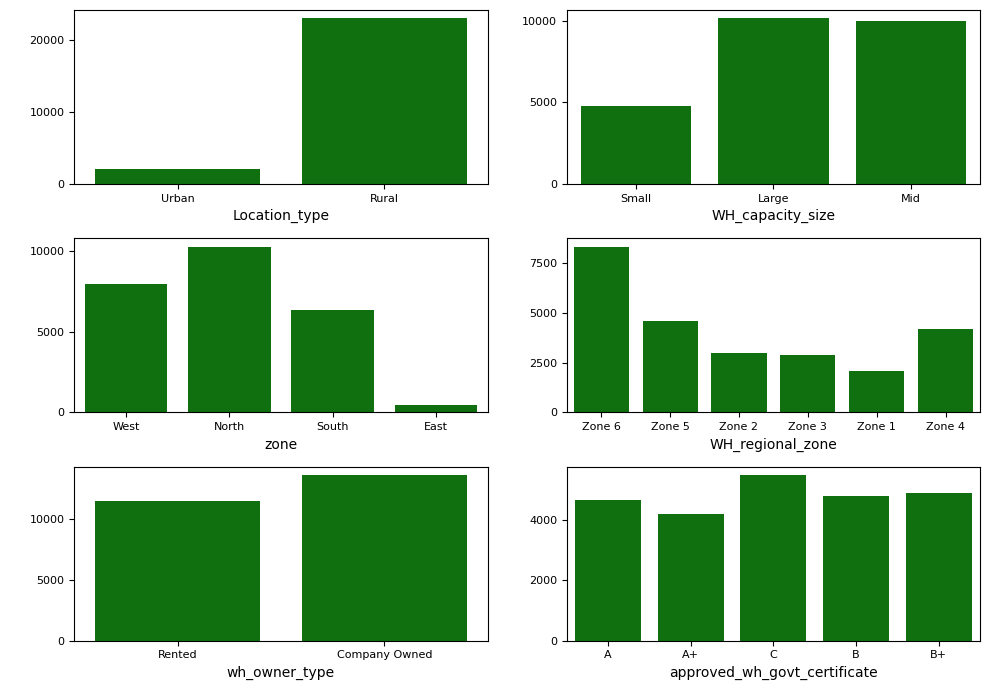

In [17]:
features2 = ['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']
for i in range(0, len(features2)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x = df[features2[i]], color = 'green')
    plt.ylabel(' ')
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()

As previously stated, the Location Type column is quite interesting because of the disparity in value between Rural and Urban. This column could be something interesting to do further analysis regarding the cause.

## 3. Data Cleaning

### a) Imputation on missing values

In [18]:
missing_workers = df[df['workers_num'].isna()]
missing_workers['wh_est_year'].value_counts()

wh_est_year
2014.0    29
2017.0    28
2013.0    27
2002.0    27
2009.0    24
2008.0    23
2020.0    23
2001.0    23
2005.0    23
2011.0    23
2007.0    21
1998.0    21
2021.0    21
2016.0    20
1999.0    20
2015.0    19
2004.0    19
2018.0    19
2010.0    18
2006.0    18
2019.0    16
2012.0    16
2000.0    14
2022.0    13
1997.0    12
2003.0    11
1996.0     6
2023.0     4
Name: count, dtype: int64

Because the missing values ​​in the workers_num column were previously assumed to be because the warehouse was newly established or had not been recorded, but after checking with the warehouse establishment year column, it turned out that the distribution of the missing value data was random, so it will be imputed with the median of the WH_Capacity_Size group.

In [19]:
df['workers_num'] = df['workers_num'].fillna(
    df.groupby('WH_capacity_size')['workers_num'].transform('median')
)

For imputation on the wh_est_year column, it will be done by using the median value of all wh_est_year values ​​in the dataframe because it is normal in terms of distribution. But before that, flagging is done first to mark the rows whose wh_est_year is imputed, if later a more in-depth analysis is needed on warehouses whose year of establishment is empty.

In [20]:
df['wh_est_missing_flag'] = df['wh_est_year'].apply(lambda x: 1 if pd.isnull(x) else 0)

In [21]:
df['wh_est_year'] = df['wh_est_year'].fillna(df['wh_est_year'].median())

For the imputation of the approved_wh_govt_certificate column, an approach will be taken to create a new value, namely "Not Yet Certified" or "Unknown" so that it still appears in the visual.

In [22]:
df['approved_wh_govt_certificate'] = df['approved_wh_govt_certificate'].fillna('Not Yet Certified')

Check to ensure that the missing values ​​imputation process was successful.

In [23]:
df.isna().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
wh_est_missing_flag             0
dtype: int64

### b) Mapping column values

For the Competitor_in_mkt column, we create a new segmentation, namely ">= 9" for competitor values greater than or equal to 9 and the value 0 is combined with the value 1 and for value mapping in columns that contain nominal data but have not been defined, here is the mapping:
  
flood_impacted:  
0: Not Impacted Area  
1: Impacted Area  
  
flood_proof:  
0: Not Flood Proof  
1: Flood Proof  
  
electric_supply:  
0: No Backup Power  
1: Has Backup Power  
  
temp_reg_mach:  
0: No Temperature Regulation  
1: Has Temperature Regulation

In [24]:
def simplify_competitor(x):
    if x >= 9:
        return '>=9'
    elif x == 0:
        return '1'
    else:
        return str(x)  # keep it as a string so it can be categorical

df['competitor_group'] = df['Competitor_in_mkt'].apply(simplify_competitor)

# If you want to see the distribution:
print(df['competitor_group'].value_counts())

competitor_group
2      8669
3      7094
4      6708
5      1265
6       546
1       433
7       189
8        76
>=9      20
Name: count, dtype: int64


In [25]:
df.flood_impacted = df.flood_impacted.map({
    0: 'Not Impacted Area', 
    1: 'Impacted Area',
})
df.flood_proof = df.flood_proof.map({
    0: 'Not Flood Proof', 
    1: 'Flood Proof',
})
df.electric_supply = df.electric_supply.map({
    0: 'No Backup Power', 
    1: 'Has Backup Power',
})
df.temp_reg_mach = df.temp_reg_mach.map({
    0: 'No Temperature Regulation', 
    1: 'Has Temperature Regulation',
})

In [26]:
print(df['flood_impacted'].value_counts())
print('=================================')
print(df['flood_proof'].value_counts())
print('=================================')
print(df['electric_supply'].value_counts())
print('=================================')
print(df['temp_reg_mach'].value_counts())

flood_impacted
Not Impacted Area    22546
Impacted Area         2454
Name: count, dtype: int64
flood_proof
Not Flood Proof    23634
Flood Proof         1366
Name: count, dtype: int64
electric_supply
Has Backup Power    16422
No Backup Power      8578
Name: count, dtype: int64
temp_reg_mach
No Temperature Regulation     17418
Has Temperature Regulation     7582
Name: count, dtype: int64


In [27]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,wh_est_missing_flag,competitor_group
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,Not Impacted Area,Flood Proof,Has Backup Power,91,29.0,2009.0,13,No Temperature Regulation,A,5,15,17115,1,2
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,Not Impacted Area,Not Flood Proof,Has Backup Power,210,31.0,2009.0,4,No Temperature Regulation,A,3,17,5074,1,4
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,Not Impacted Area,Not Flood Proof,No Backup Power,161,37.0,2009.0,17,No Temperature Regulation,A,6,22,23137,1,4
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,Not Impacted Area,Not Flood Proof,No Backup Power,103,21.0,2009.0,17,Has Temperature Regulation,A+,3,27,22115,1,2
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,Impacted Area,Not Flood Proof,Has Backup Power,112,25.0,2009.0,18,No Temperature Regulation,C,6,24,24071,0,2


## 4. Exploratory Data Analysis 2 - Insight Building

### #Business-Logic Driven

**Product Weight Shipped VS Storage Issue Reported Last 3 Months**

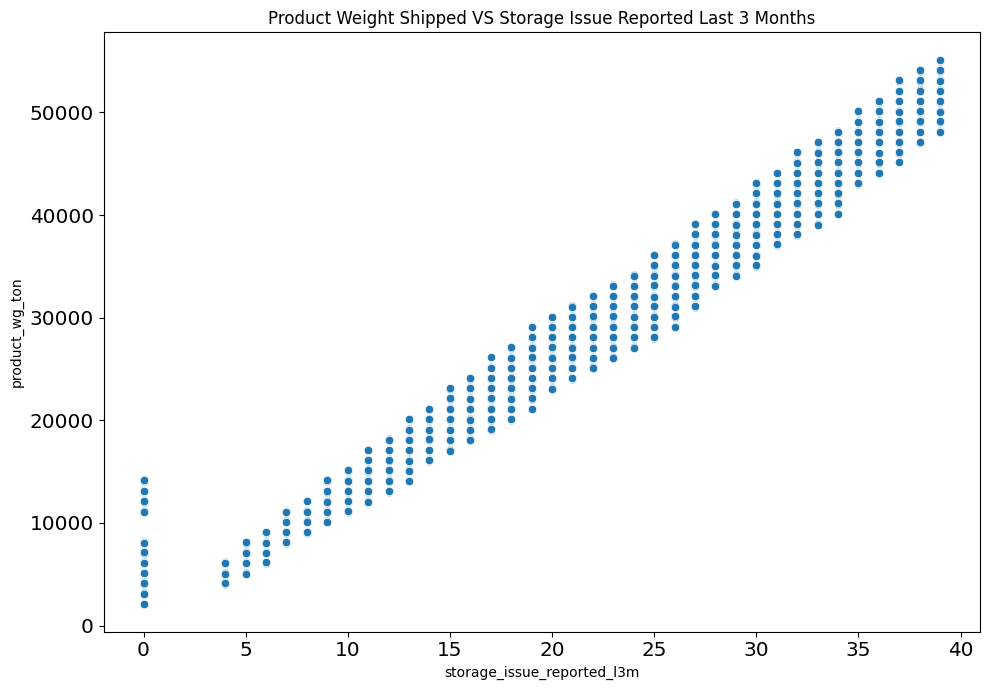

In [28]:
sns.scatterplot(x='storage_issue_reported_l3m', y='product_wg_ton', data=df)
plt.title('Product Weight Shipped VS Storage Issue Reported Last 3 Months')
plt.tight_layout()

Warehouse dengan volume pengiriman tinggi cenderung lebih sering mengalami dan melaporkan storage issue. Ini menunjukkan pentingnya manajemen kapasitas dan infrastruktur penyimpanan yang adaptif untuk warehouse berperforma tinggi.

**Product Weight Shipped VS Warehouse Breakdown Last 3 Months**

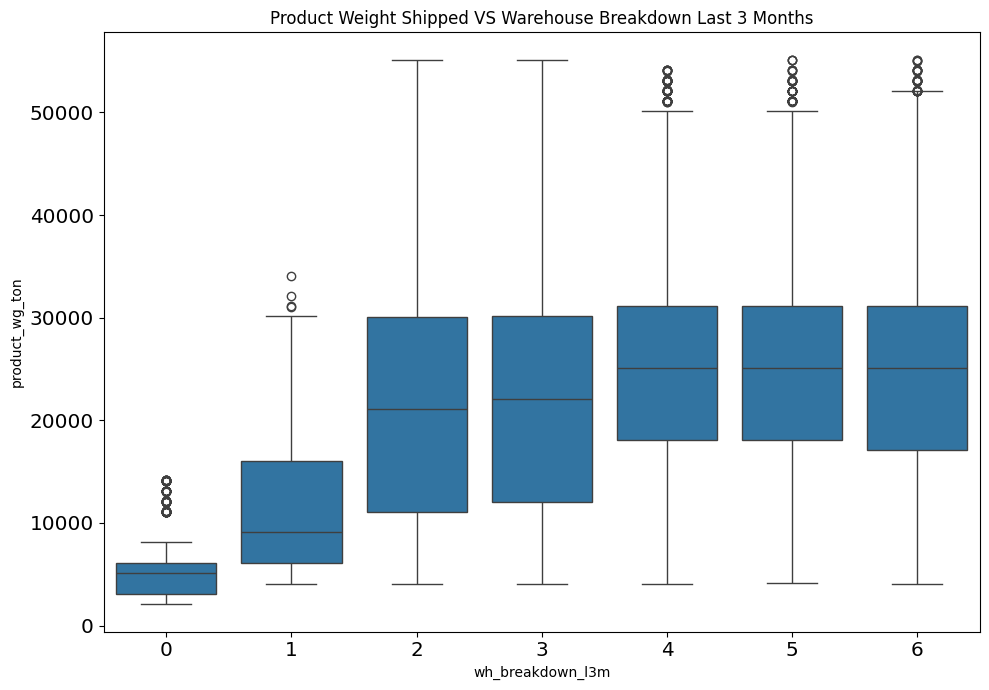

In [29]:
sns.boxplot(x='wh_breakdown_l3m', y='product_wg_ton', data=df)
plt.title('Product Weight Shipped VS Warehouse Breakdown Last 3 Months')
plt.tight_layout()

**1. Apakah lokasi gudang di desa atau kota mempengaruhi jumlah distribusi produk?**

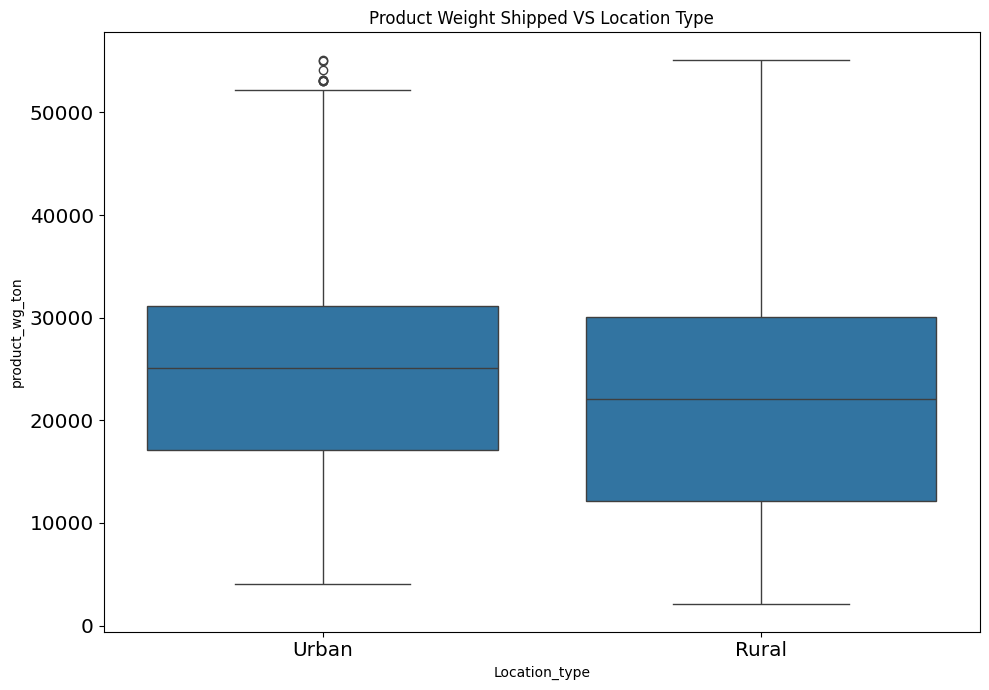

In [30]:
sns.boxplot(x='Location_type', y='product_wg_ton', data=df)
plt.title('Product Weight Shipped VS Location Type')
plt.tight_layout()

**2.  Seberapa sering pengisian stok dalam 3 bulan terakhir berdasarkan zona?**

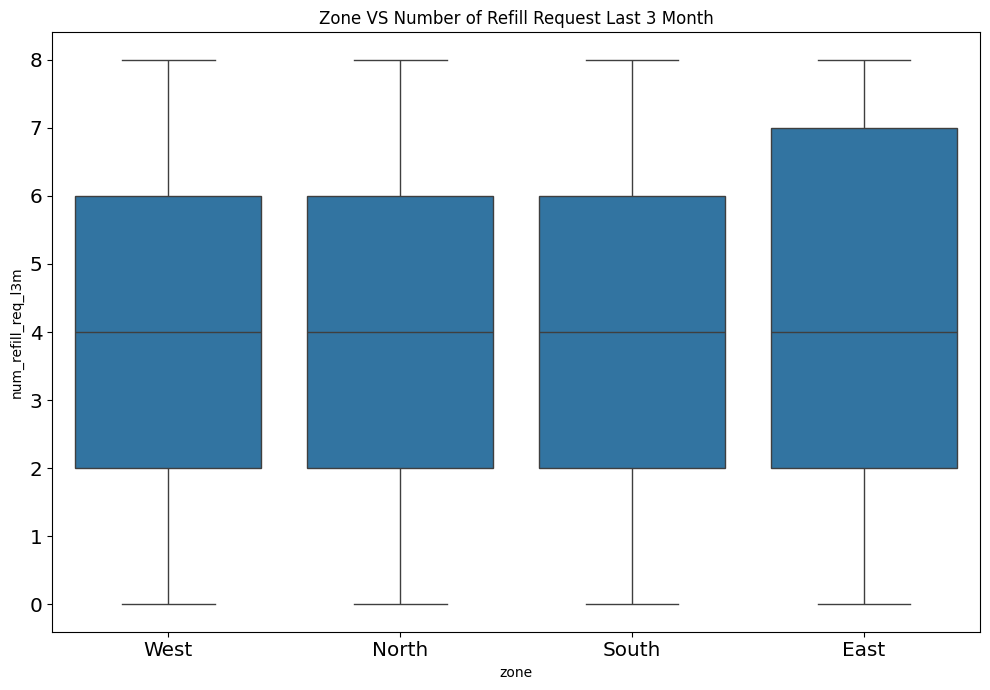

In [31]:
sns.boxplot(x='zone', y='num_refill_req_l3m', data=df)
plt.title('Zone VS Number of Refill Request Last 3 Month')
plt.tight_layout()

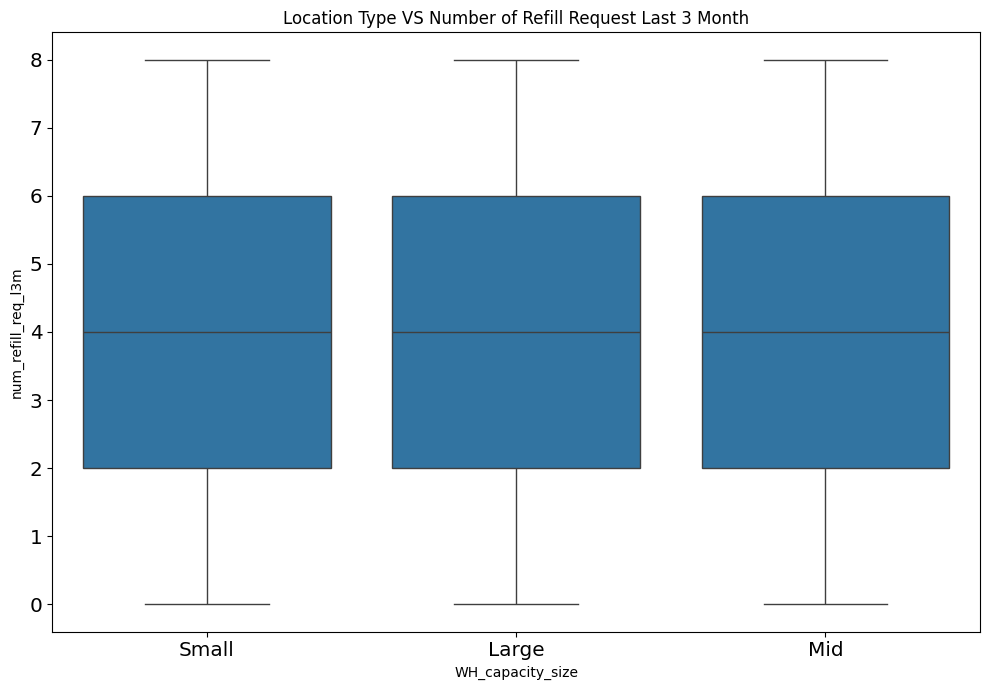

In [32]:
sns.boxplot(x='WH_capacity_size', y='num_refill_req_l3m', data=df)
plt.title('Location Type VS Number of Refill Request Last 3 Month')
plt.tight_layout()

**3. Apakah gudang dengan riwayat masalah transportasi (transport_issue_l1y) memiliki 
pengiriman yang lebih rendah?**

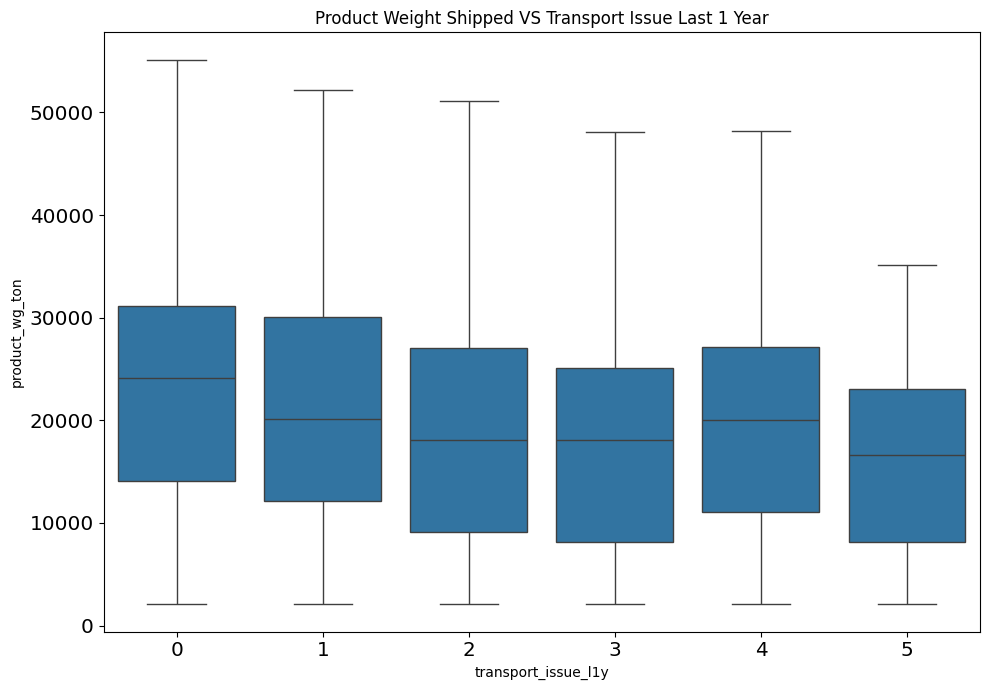

In [33]:
sns.boxplot(x='transport_issue_l1y', y='product_wg_ton', data=df)
plt.title('Product Weight Shipped VS Transport Issue Last 1 Year')
plt.tight_layout()

**4. Seberapa besar pengaruh dist_from_hub terhadap berat produk yang dikirim?**

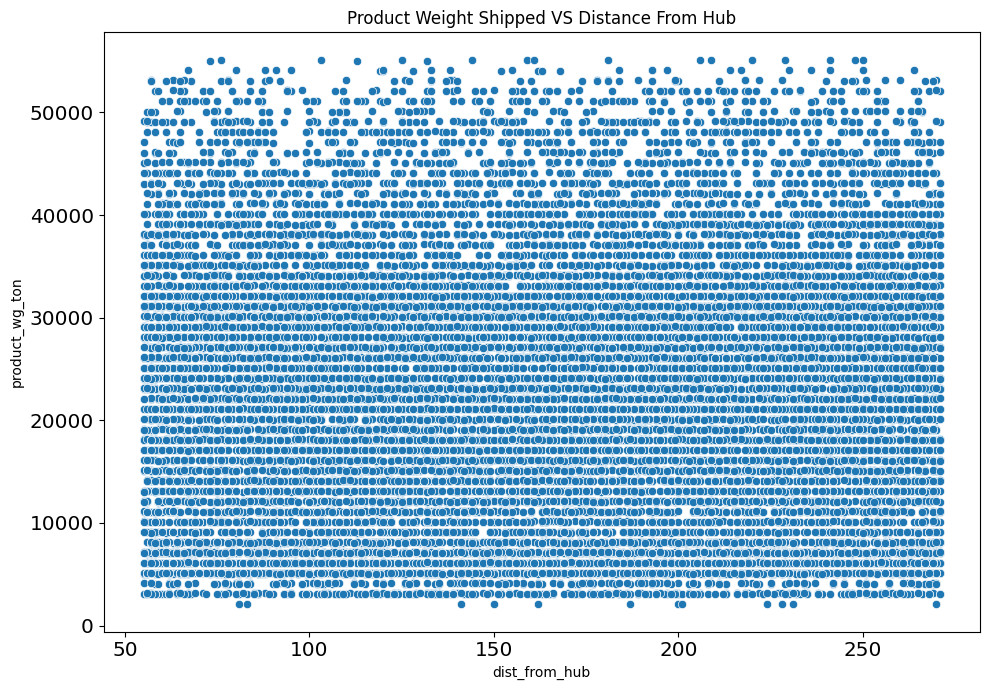

In [34]:
sns.scatterplot(x='dist_from_hub', y='product_wg_ton', data=df)
plt.title('Product Weight Shipped VS Distance From Hub')
plt.tight_layout()

**5. Apakah gudang yang terdampak banjir (flood_impacted) atau tidak flood-proof 
cenderung memiliki pengiriman lebih rendah?**

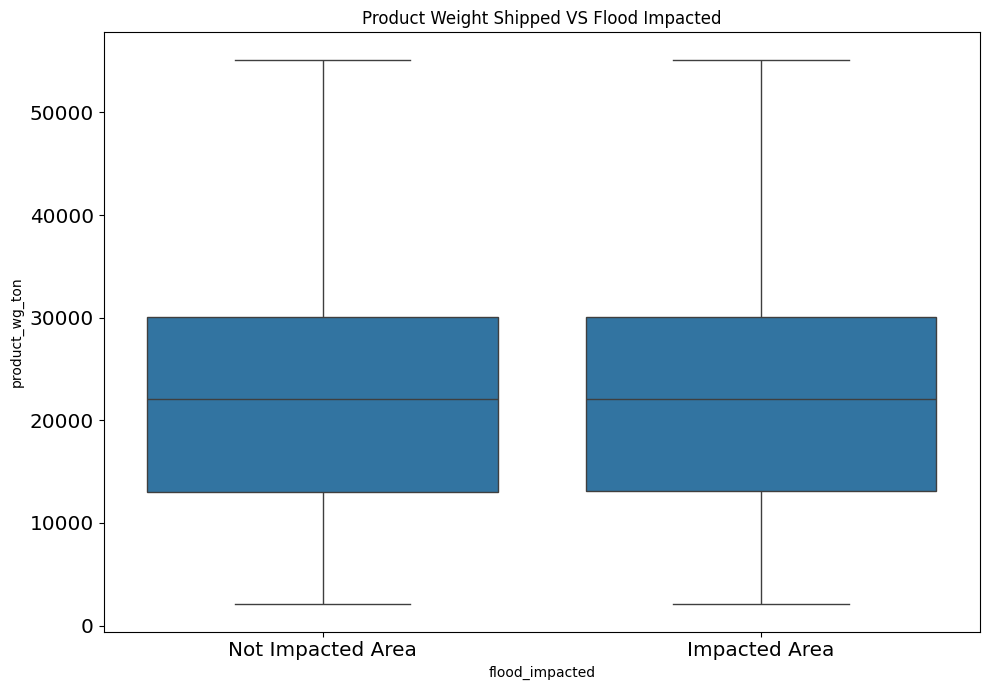

In [35]:
sns.boxplot(x='flood_impacted', y='product_wg_ton', data=df)
plt.title('Product Weight Shipped VS Flood Impacted')
plt.tight_layout()

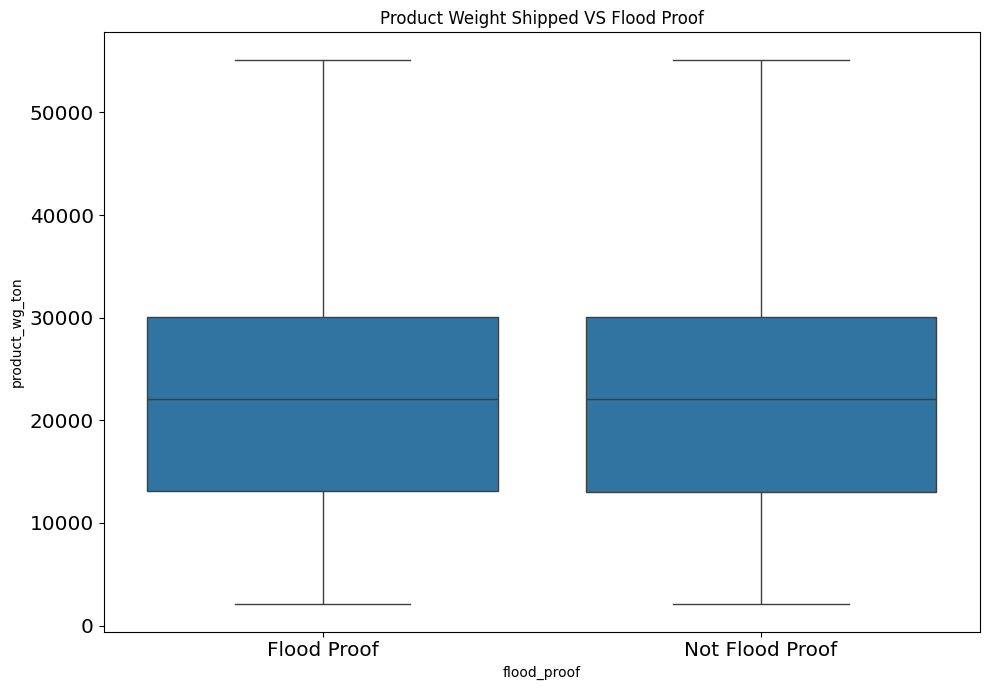

In [36]:
sns.boxplot(x='flood_proof', y='product_wg_ton', data=df)
plt.title('Product Weight Shipped VS Flood Proof')
plt.tight_layout()

**6. Apakah keberadaan electric_supply atau temp_reg_mach berhubungan dengan 
performa gudang dalam distribusi produk?**

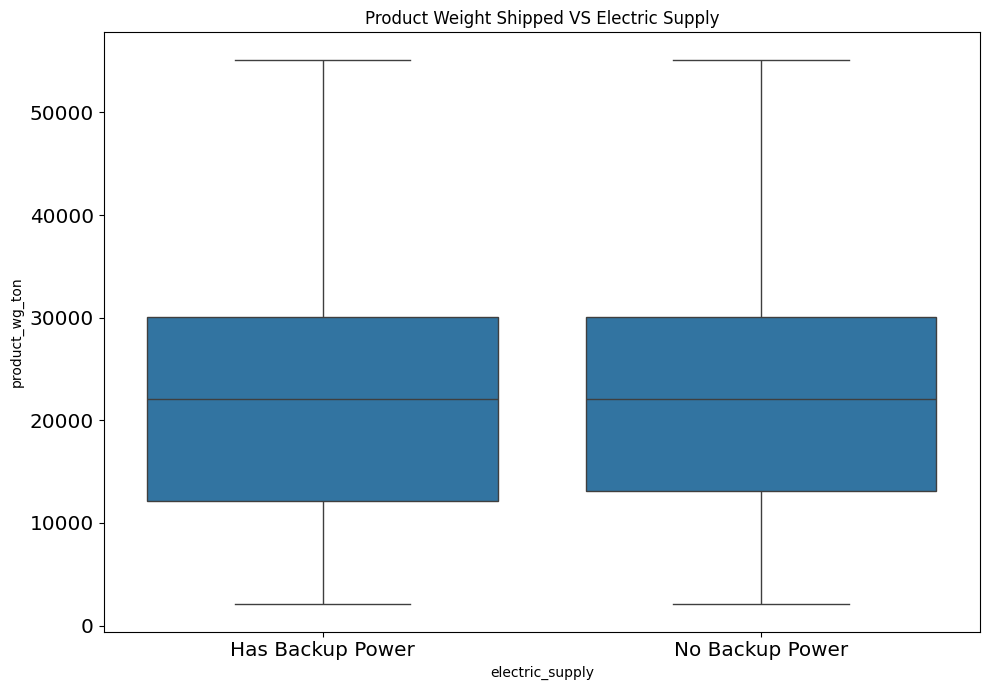

In [37]:
sns.boxplot(x='electric_supply', y='product_wg_ton', data=df)
plt.title('Product Weight Shipped VS Electric Supply')
plt.tight_layout()

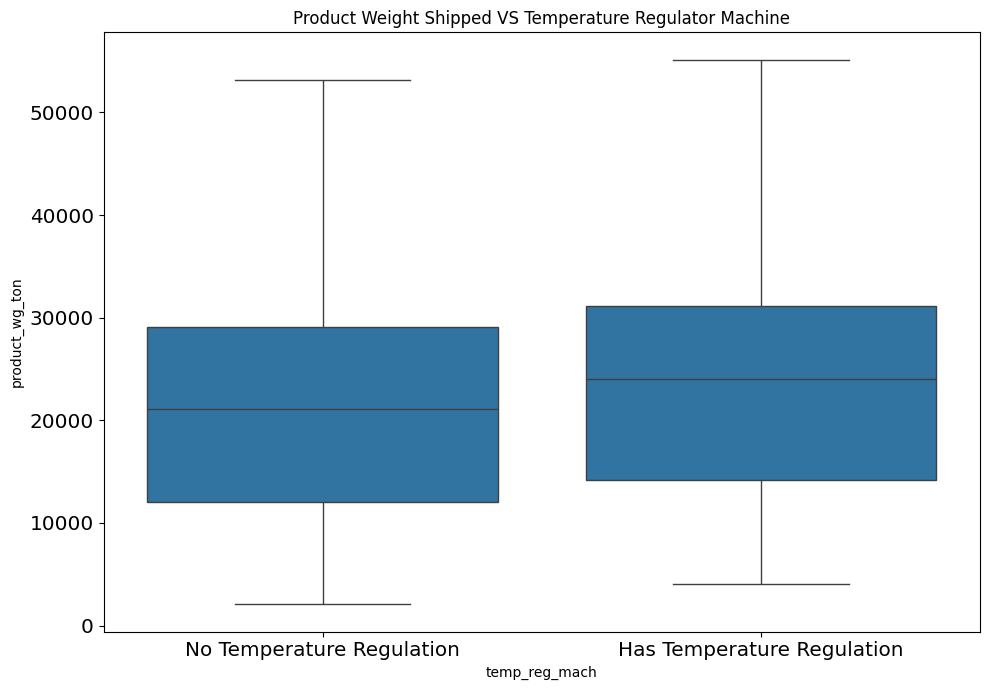

In [38]:
sns.boxplot(x='temp_reg_mach', y='product_wg_ton', data=df)
plt.title('Product Weight Shipped VS Temperature Regulator Machine')
plt.tight_layout()

**Apakah jumlah distributor (distributor_num) berdampak pada total pengiriman 
produk ke area tersebut?**

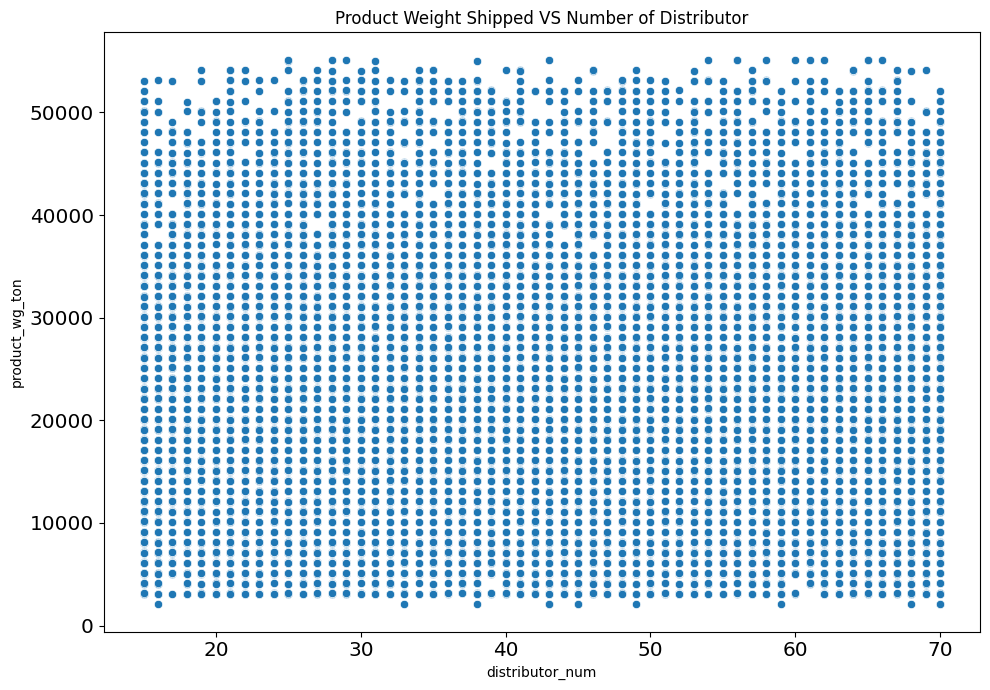

In [39]:
sns.scatterplot(x='distributor_num', y='product_wg_ton', data=df)
plt.title('Product Weight Shipped VS Number of Distributor')
plt.tight_layout()

**Seberapa besar pengaruh wh_breakdown_l3m terhadap turunnya pasokan ke gudang**

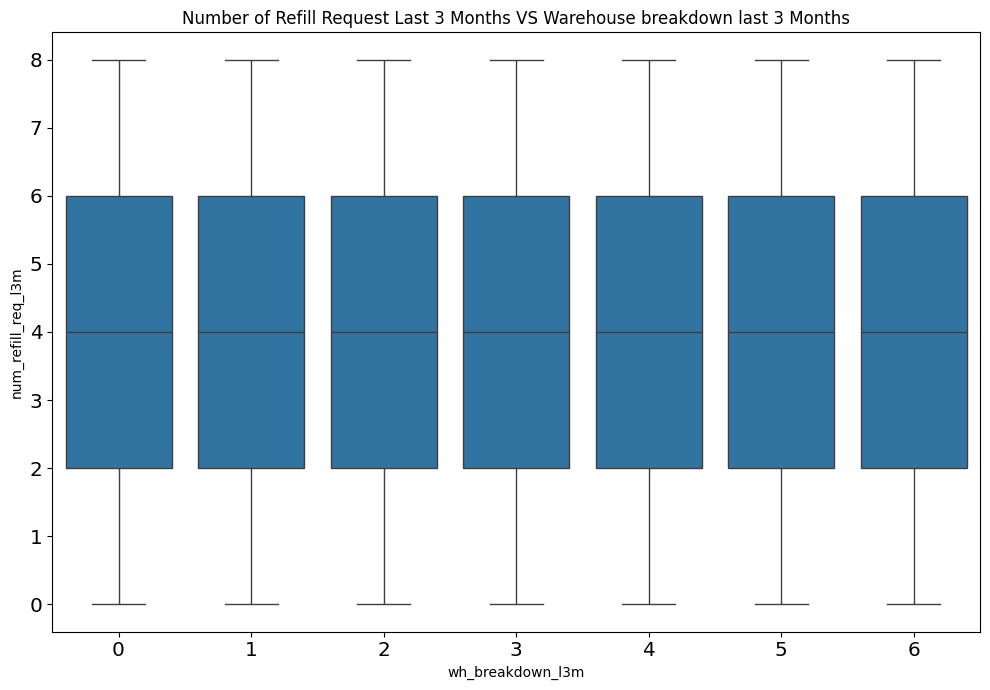

In [40]:
sns.boxplot(x='wh_breakdown_l3m', y='num_refill_req_l3m', data=df)
plt.title('Number of Refill Request Last 3 Months VS Warehouse breakdown last 3 Months')
plt.tight_layout()

**Apakah jumlah kompetitor (Competitor_group) memengaruhi jumlah produk yang 
dikirim ke suatu area?**

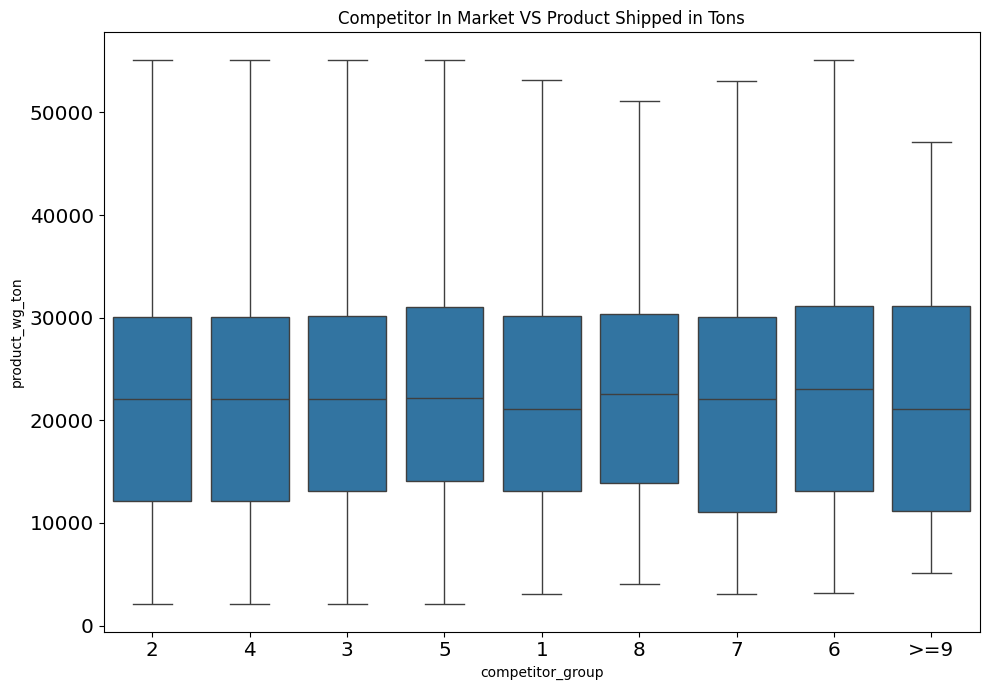

In [41]:
sns.boxplot(x='competitor_group', y='product_wg_ton', data=df)
plt.title('Competitor In Market VS Product Shipped in Tons')
plt.tight_layout()

**Apakah gudang dengan approved_wh_govt_certificate tertentu memiliki performa 
distribusi lebih tinggi?**

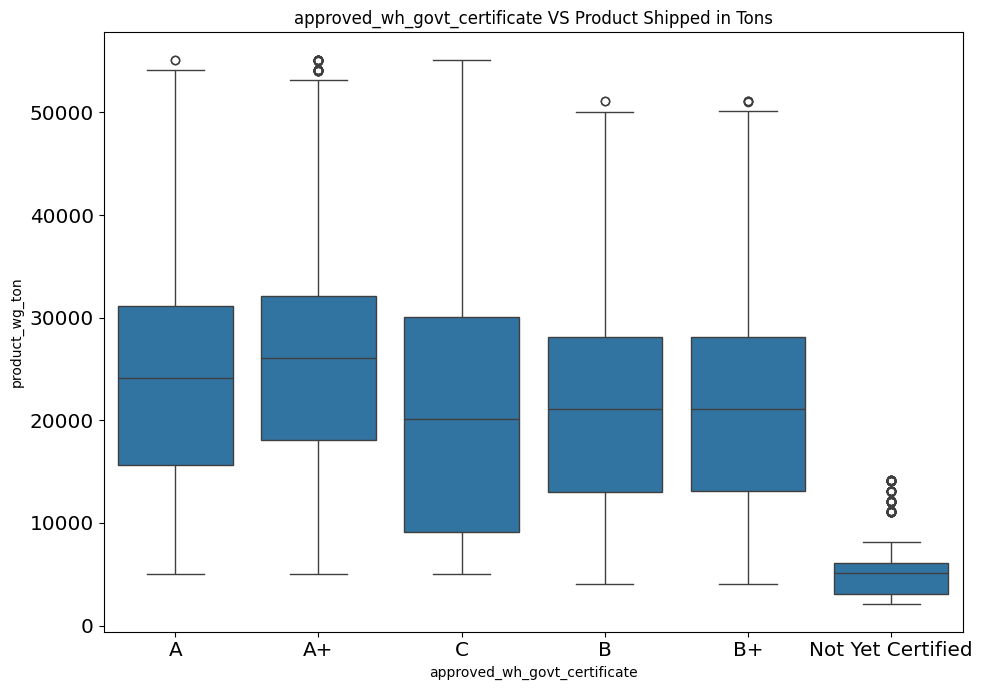

In [42]:
sns.boxplot(x='approved_wh_govt_certificate', y='product_wg_ton', data=df)
plt.title('approved_wh_govt_certificate VS Product Shipped in Tons')
plt.tight_layout()

**Apakah gudang yang dibangun lebih lama (wh_est_year) cenderung memiliki lebih 
banyak masalah dan pengiriman lebih rendah?**

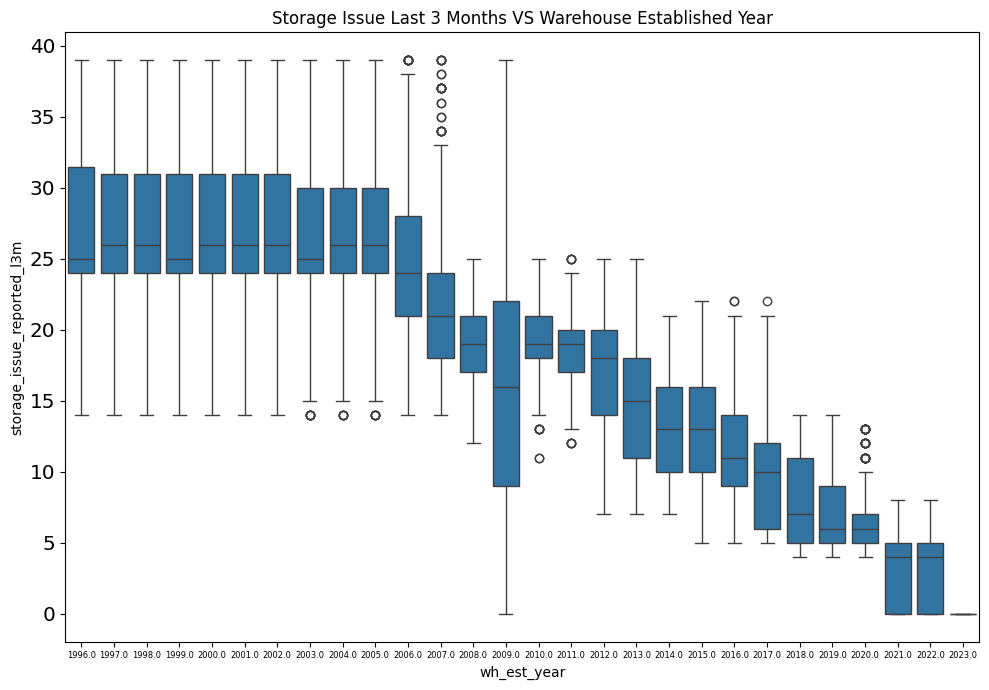

In [43]:
sns.boxplot(x='wh_est_year', y='storage_issue_reported_l3m', data=df)
plt.title('Storage Issue Last 3 Months VS Warehouse Established Year')
plt.xticks(fontsize=6)
plt.tight_layout()

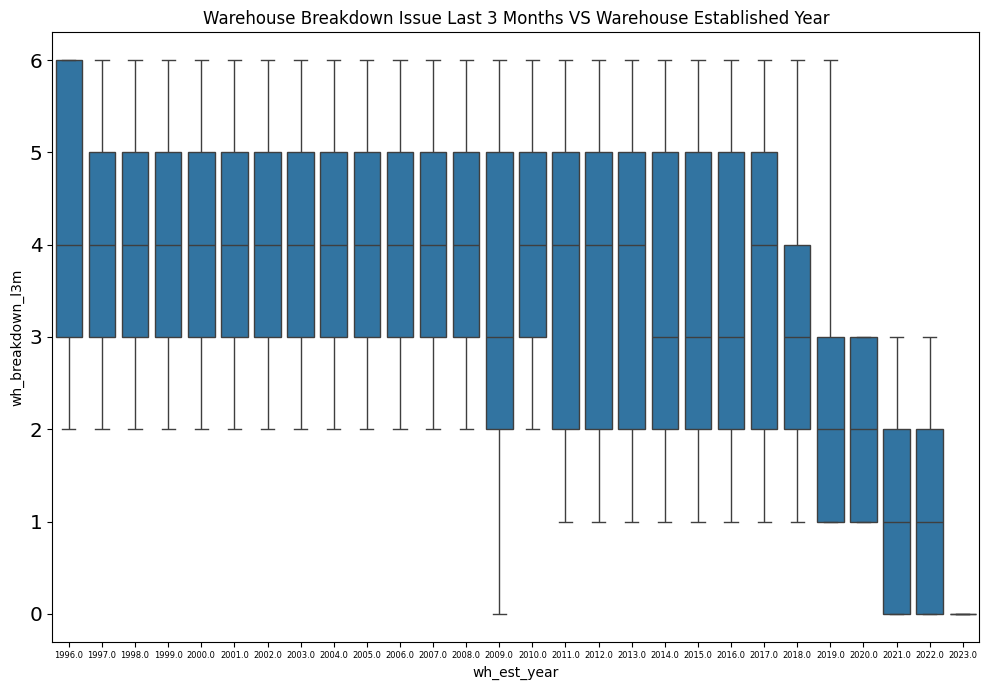

In [44]:
sns.boxplot(x='wh_est_year', y='wh_breakdown_l3m', data=df)
plt.title('Warehouse Breakdown Issue Last 3 Months VS Warehouse Established Year')
plt.xticks(fontsize=6)
plt.tight_layout()

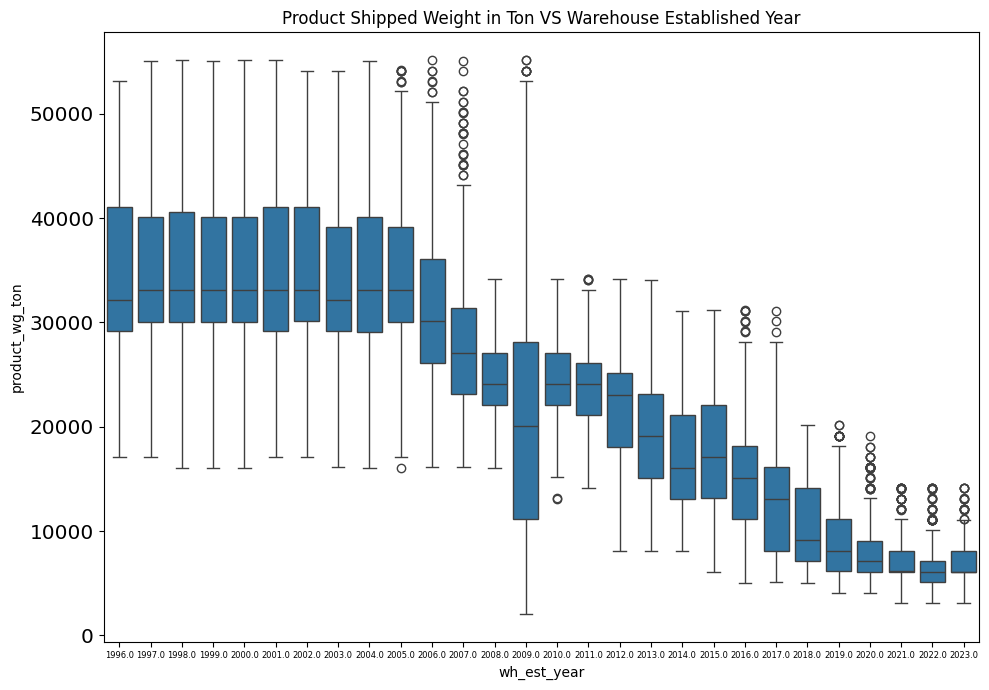

In [45]:
sns.boxplot(x='wh_est_year', y='product_wg_ton', data=df)
plt.title('Product Shipped Weight in Ton VS Warehouse Established Year')
plt.xticks(fontsize=6)
plt.tight_layout()

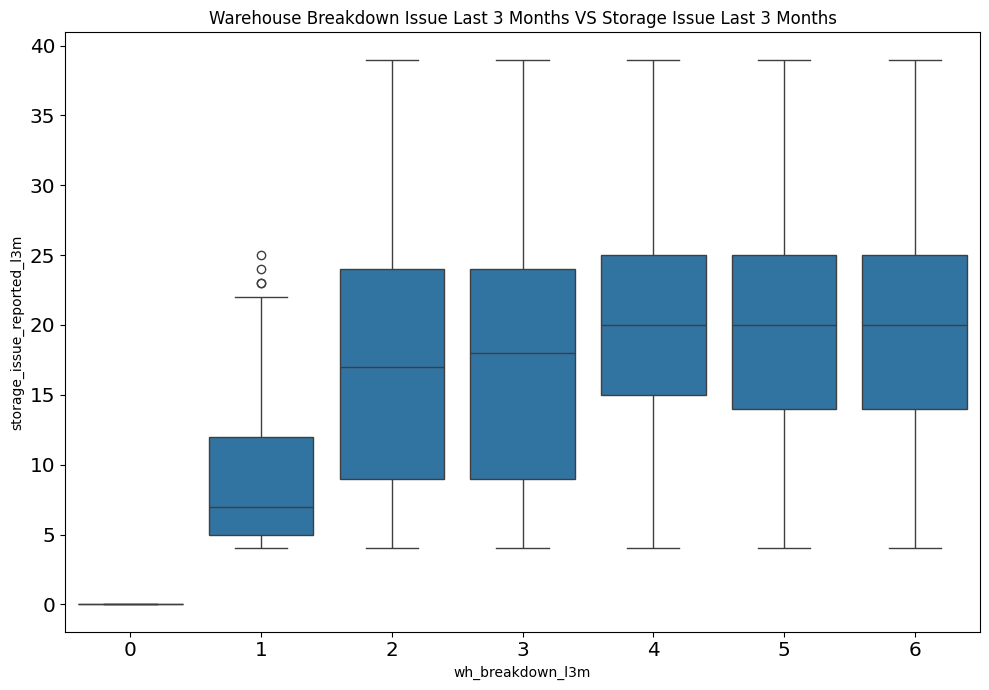

In [46]:
sns.boxplot(x='wh_breakdown_l3m', y='storage_issue_reported_l3m', data=df)
plt.title('Warehouse Breakdown Issue Last 3 Months VS Storage Issue Last 3 Months')
plt.tight_layout()

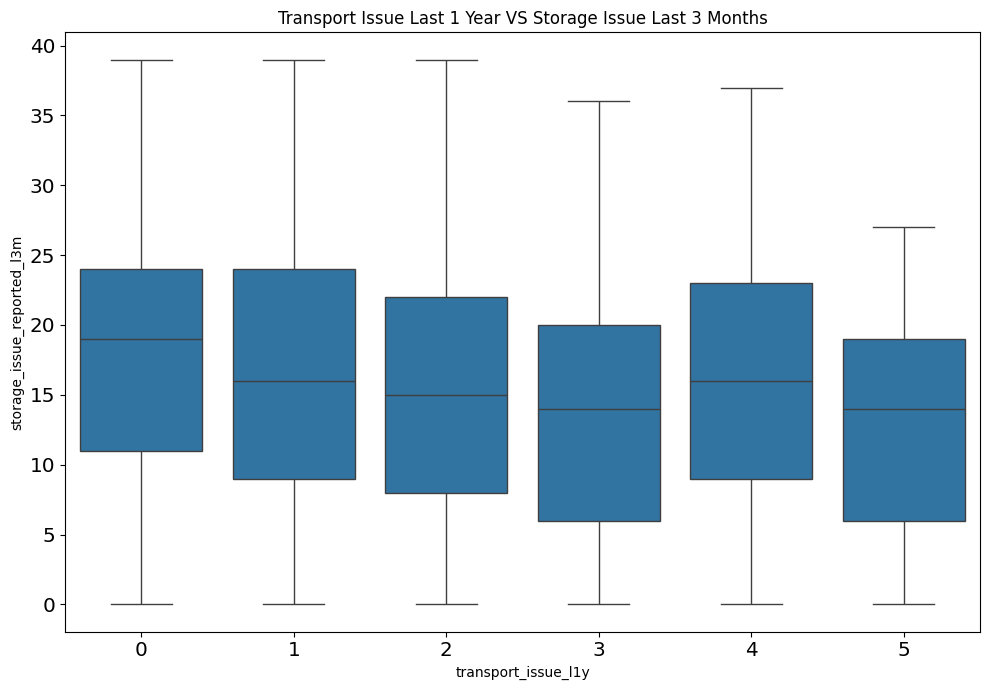

In [47]:
sns.boxplot(x='transport_issue_l1y', y='storage_issue_reported_l3m', data=df)
plt.title('Transport Issue Last 1 Year VS Storage Issue Last 3 Months')
plt.tight_layout()

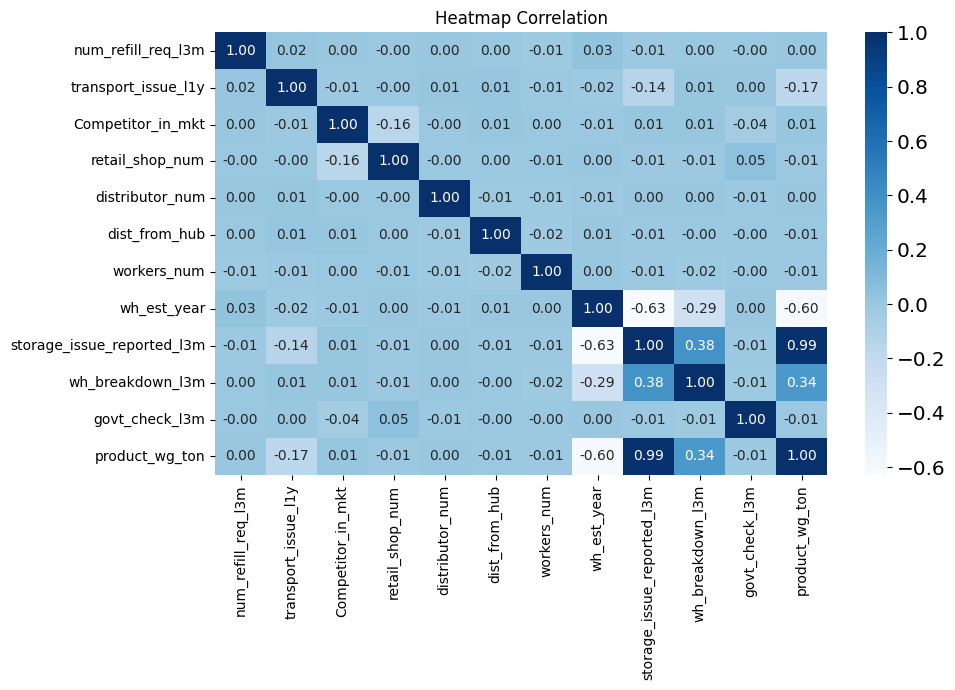

In [48]:
numdf = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 'dist_from_hub', 'workers_num', 'wh_est_year', 'storage_issue_reported_l3m', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton']

sns.heatmap(df[numdf].corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title('Heatmap Correlation')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  object 
 13  f

In [51]:
df.to_excel('fmcg_data.xlsx', index=False)